In [1]:
%cd ../
%matplotlib inline

/home/eli/AnacondaProjects/HTFATorch


In [2]:
import logging
import numpy as np
import htfa_torch.dtfa as DTFA
import htfa_torch.niidb as niidb
import htfa_torch.utils as utils

In [3]:
logging.basicConfig(format='%(asctime)s %(message)s', datefmt='%m/%d/%Y %H:%M:%S',
                    level=logging.INFO)

In [4]:
lepping_db = niidb.FMriActivationsDb('data/sound_depression.db', mask='/home/eli/Documents/sound_depression/ds000171-download/all_tasks/wholebrain.nii.gz')

In [5]:
dtfa = DTFA.DeepTFA(lepping_db.all(), mask='/home/eli/Documents/sound_depression/ds000171-download/all_tasks/wholebrain.nii.gz', num_factors=100, embedding_dim=2)

12/28/2018 11:03:32 Loading Nifti image /home/eli/Documents/sound_depression/fmriprep/sub-mdd07/func/sub-mdd07_task-nonmusic_run-5_bold_space-MNI152NLin2009cAsym_preproc.nii.gz with mask /home/eli/Documents/sound_depression/ds000171-download/all_tasks/wholebrain.nii.gz (zscore=True, smooth=None)
12/28/2018 11:03:33 Loading Nifti image /home/eli/Documents/sound_depression/fmriprep/sub-mdd06/func/sub-mdd06_task-music_run-1_bold_space-MNI152NLin2009cAsym_preproc.nii.gz with mask /home/eli/Documents/sound_depression/ds000171-download/all_tasks/wholebrain.nii.gz (zscore=True, smooth=None)
12/28/2018 11:03:34 Loading Nifti image /home/eli/Documents/sound_depression/fmriprep/sub-mdd18/func/sub-mdd18_task-nonmusic_run-2_bold_space-MNI152NLin2009cAsym_preproc.nii.gz with mask /home/eli/Documents/sound_depression/ds000171-download/all_tasks/wholebrain.nii.gz (zscore=True, smooth=None)
12/28/2018 11:03:36 Loading Nifti image /home/eli/Documents/sound_depression/fmriprep/sub-mdd12/func/sub-mdd12_t

In [6]:
dtfa.normalize_activations()

[tensor(5.2057),
 tensor(10.1980),
 tensor(6.1262),
 tensor(6.6681),
 tensor(6.2172),
 tensor(6.4215),
 tensor(6.4215),
 tensor(6.5839),
 tensor(5.5520),
 tensor(5.2057),
 tensor(6.6681),
 tensor(6.5711),
 tensor(5.1019),
 tensor(6.2172),
 tensor(4.9519),
 tensor(6.9452),
 tensor(5.2189),
 tensor(5.1019),
 tensor(5.5381),
 tensor(4.7528),
 tensor(7.6513),
 tensor(4.7528),
 tensor(5.2189),
 tensor(5.8655),
 tensor(7.6513),
 tensor(5.8655),
 tensor(5.5520),
 tensor(4.8924),
 tensor(6.9452),
 tensor(6.5711),
 tensor(6.7634),
 tensor(5.8658),
 tensor(6.7634),
 tensor(6.1262),
 tensor(4.8924),
 tensor(5.8658),
 tensor(5.5381),
 tensor(10.1980),
 tensor(6.5839)]

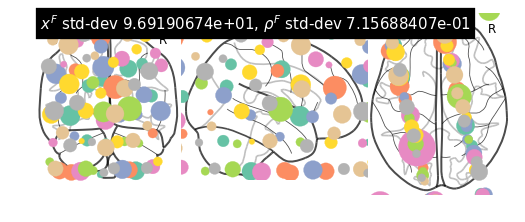

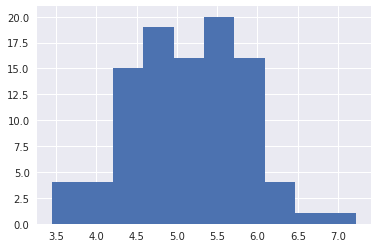

(<nilearn.plotting.displays.OrthoProjector at 0x7f222c38c1d0>,
 tensor([[ -46.5662,   45.5624,   82.8475],
         [  28.8685,  -38.9619,  -64.3973],
         [  35.6255,  -60.1125,   48.1486],
         [  -2.6838,   84.5748,  -33.8420],
         [  21.1409,   -6.8909,   43.0441],
         [ -20.7236,  -64.6796,   24.9304],
         [   3.1762,   59.9653,   79.9454],
         [ -40.1890,   12.5542,   -6.3874],
         [ -22.4167,  -68.2538,  -32.4109],
         [  45.3431, -111.2265,   14.3264],
         [  -8.1515, -117.3397,  -68.2047],
         [  -6.2811,   83.7796,   30.3383],
         [ -15.7160,  -92.7231,  112.2084],
         [  -8.0939, -120.0731,   75.7567],
         [ -41.2598,    1.8806,  104.6715],
         [  22.0544,   -3.7164,  -63.4017],
         [  19.9506,   -1.4979,  107.5210],
         [ -34.5209,  -11.2162,   41.4537],
         [ -38.8782,    2.6846,  -66.1069],
         [ -14.4950,  -81.7323,   -2.2015],
         [ -51.2791,   39.6080,  -64.3420],
         [   

In [7]:
dtfa.visualize_factor_embedding()

In [8]:
losses = dtfa.train(num_steps=2000, learning_rate=1e-2, log_level=logging.INFO, num_particles=1,
                    batch_size=25, use_cuda=True, checkpoint_steps=50, blocks_batch_size=4, patience=100)

12/28/2018 11:05:07 [Epoch 1] (2734ms) Posterior free-energy 9.08193280e+07 = KL from prior 5.55693237e+02 - log-likelihood -9.08187760e+07
12/28/2018 11:05:07 Saving checkpoint...
12/28/2018 11:05:09 [Epoch 2] (2584ms) Posterior free-energy 8.95784800e+07 = KL from prior 7.85670715e+02 - log-likelihood -8.95776880e+07
12/28/2018 11:05:12 [Epoch 3] (2620ms) Posterior free-energy 8.72471920e+07 = KL from prior 8.87264893e+02 - log-likelihood -8.72463120e+07
12/28/2018 11:05:15 [Epoch 4] (2631ms) Posterior free-energy 8.60112800e+07 = KL from prior 1.05629907e+03 - log-likelihood -8.60102240e+07
12/28/2018 11:05:17 [Epoch 5] (2625ms) Posterior free-energy 8.53795680e+07 = KL from prior 1.03981482e+03 - log-likelihood -8.53785360e+07
12/28/2018 11:05:20 [Epoch 6] (2623ms) Posterior free-energy 8.42876800e+07 = KL from prior 1.17160767e+03 - log-likelihood -8.42865200e+07
12/28/2018 11:05:23 [Epoch 7] (2624ms) Posterior free-energy 8.38136000e+07 = KL from prior 1.23008899e+03 - log-likeli

Epoch  1411: reducing learning rate of group 0 to 5.0000e-03.
Epoch  1411: reducing learning rate of group 1 to 5.0000e-04.


12/28/2018 12:06:50 [Epoch 1413] (2606ms) Posterior free-energy 7.04989920e+07 = KL from prior 4.24257500e+04 - log-likelihood -7.04565680e+07
12/28/2018 12:06:52 [Epoch 1414] (2605ms) Posterior free-energy 7.04971520e+07 = KL from prior 4.21774609e+04 - log-likelihood -7.04549680e+07
12/28/2018 12:06:55 [Epoch 1415] (2611ms) Posterior free-energy 7.04969920e+07 = KL from prior 4.17405000e+04 - log-likelihood -7.04552560e+07
12/28/2018 12:06:57 [Epoch 1416] (2602ms) Posterior free-energy 7.04963040e+07 = KL from prior 4.14678047e+04 - log-likelihood -7.04548320e+07
12/28/2018 12:07:00 [Epoch 1417] (2606ms) Posterior free-energy 7.04948320e+07 = KL from prior 4.15142031e+04 - log-likelihood -7.04533200e+07
12/28/2018 12:07:03 [Epoch 1418] (2602ms) Posterior free-energy 7.04957280e+07 = KL from prior 4.24833320e+04 - log-likelihood -7.04532400e+07
12/28/2018 12:07:05 [Epoch 1419] (2602ms) Posterior free-energy 7.04959040e+07 = KL from prior 4.29207344e+04 - log-likelihood -7.04529840e+07

Epoch  1516: reducing learning rate of group 0 to 2.5000e-03.
Epoch  1516: reducing learning rate of group 1 to 2.5000e-04.


12/28/2018 12:11:25 [Epoch 1518] (2624ms) Posterior free-energy 7.04926400e+07 = KL from prior 4.17233750e+04 - log-likelihood -7.04509200e+07
12/28/2018 12:11:27 [Epoch 1519] (2617ms) Posterior free-energy 7.04914480e+07 = KL from prior 4.16789102e+04 - log-likelihood -7.04497680e+07
12/28/2018 12:11:30 [Epoch 1520] (2616ms) Posterior free-energy 7.04907520e+07 = KL from prior 4.17872148e+04 - log-likelihood -7.04489680e+07
12/28/2018 12:11:33 [Epoch 1521] (2614ms) Posterior free-energy 7.04922560e+07 = KL from prior 4.20486328e+04 - log-likelihood -7.04502080e+07
12/28/2018 12:11:35 [Epoch 1522] (2611ms) Posterior free-energy 7.04922480e+07 = KL from prior 4.23278828e+04 - log-likelihood -7.04499200e+07
12/28/2018 12:11:38 [Epoch 1523] (2611ms) Posterior free-energy 7.04918240e+07 = KL from prior 4.18878477e+04 - log-likelihood -7.04499280e+07
12/28/2018 12:11:40 [Epoch 1524] (2613ms) Posterior free-energy 7.04912640e+07 = KL from prior 4.18833906e+04 - log-likelihood -7.04493760e+07

Epoch  1617: reducing learning rate of group 0 to 1.2500e-03.
Epoch  1617: reducing learning rate of group 1 to 1.2500e-04.


12/28/2018 12:15:50 [Epoch 1619] (2617ms) Posterior free-energy 7.04912320e+07 = KL from prior 4.27710430e+04 - log-likelihood -7.04484640e+07
12/28/2018 12:15:52 [Epoch 1620] (2605ms) Posterior free-energy 7.04906000e+07 = KL from prior 4.27977812e+04 - log-likelihood -7.04478080e+07
12/28/2018 12:15:55 [Epoch 1621] (2606ms) Posterior free-energy 7.04905120e+07 = KL from prior 4.29538867e+04 - log-likelihood -7.04475600e+07
12/28/2018 12:15:58 [Epoch 1622] (2606ms) Posterior free-energy 7.04900160e+07 = KL from prior 4.29656016e+04 - log-likelihood -7.04470560e+07
12/28/2018 12:16:00 [Epoch 1623] (2613ms) Posterior free-energy 7.04917520e+07 = KL from prior 4.29612812e+04 - log-likelihood -7.04487920e+07
12/28/2018 12:16:03 [Epoch 1624] (2605ms) Posterior free-energy 7.04912800e+07 = KL from prior 4.31225039e+04 - log-likelihood -7.04481600e+07
12/28/2018 12:16:06 [Epoch 1625] (2615ms) Posterior free-energy 7.04902320e+07 = KL from prior 4.28651875e+04 - log-likelihood -7.04473680e+07

Epoch  1733: reducing learning rate of group 0 to 6.2500e-04.
Epoch  1733: reducing learning rate of group 1 to 6.2500e-05.


12/28/2018 12:20:53 [Epoch 1735] (2612ms) Posterior free-energy 7.04890800e+07 = KL from prior 4.25546445e+04 - log-likelihood -7.04465280e+07
12/28/2018 12:20:56 [Epoch 1736] (2618ms) Posterior free-energy 7.04892800e+07 = KL from prior 4.26094297e+04 - log-likelihood -7.04466720e+07
12/28/2018 12:20:58 [Epoch 1737] (2613ms) Posterior free-energy 7.04881680e+07 = KL from prior 4.27241250e+04 - log-likelihood -7.04454560e+07
12/28/2018 12:21:01 [Epoch 1738] (2614ms) Posterior free-energy 7.04893440e+07 = KL from prior 4.29129102e+04 - log-likelihood -7.04464320e+07
12/28/2018 12:21:04 [Epoch 1739] (2612ms) Posterior free-energy 7.04897360e+07 = KL from prior 4.27349727e+04 - log-likelihood -7.04469920e+07
12/28/2018 12:21:06 [Epoch 1740] (2612ms) Posterior free-energy 7.04891360e+07 = KL from prior 4.29181953e+04 - log-likelihood -7.04462240e+07
12/28/2018 12:21:09 [Epoch 1741] (2613ms) Posterior free-energy 7.04907120e+07 = KL from prior 4.31197422e+04 - log-likelihood -7.04475920e+07

Epoch  1834: reducing learning rate of group 0 to 3.1250e-04.
Epoch  1834: reducing learning rate of group 1 to 3.1250e-05.


12/28/2018 12:25:18 [Epoch 1836] (2614ms) Posterior free-energy 7.04889120e+07 = KL from prior 4.33202539e+04 - log-likelihood -7.04455840e+07
12/28/2018 12:25:21 [Epoch 1837] (2612ms) Posterior free-energy 7.04900720e+07 = KL from prior 4.32134492e+04 - log-likelihood -7.04468560e+07
12/28/2018 12:25:24 [Epoch 1838] (2611ms) Posterior free-energy 7.04900960e+07 = KL from prior 4.30221484e+04 - log-likelihood -7.04470720e+07
12/28/2018 12:25:26 [Epoch 1839] (2619ms) Posterior free-energy 7.04886240e+07 = KL from prior 4.35721953e+04 - log-likelihood -7.04450560e+07
12/28/2018 12:25:29 [Epoch 1840] (2614ms) Posterior free-energy 7.04885280e+07 = KL from prior 4.30504609e+04 - log-likelihood -7.04454720e+07
12/28/2018 12:25:31 [Epoch 1841] (2614ms) Posterior free-energy 7.04882080e+07 = KL from prior 4.33509336e+04 - log-likelihood -7.04448560e+07
12/28/2018 12:25:34 [Epoch 1842] (2610ms) Posterior free-energy 7.04894960e+07 = KL from prior 4.33383906e+04 - log-likelihood -7.04461680e+07

Epoch  1935: reducing learning rate of group 0 to 1.5625e-04.
Epoch  1935: reducing learning rate of group 1 to 1.5625e-05.


12/28/2018 12:29:43 [Epoch 1937] (2618ms) Posterior free-energy 7.04900800e+07 = KL from prior 4.30795000e+04 - log-likelihood -7.04470080e+07
12/28/2018 12:29:45 [Epoch 1938] (2616ms) Posterior free-energy 7.04884320e+07 = KL from prior 4.31032344e+04 - log-likelihood -7.04453360e+07
12/28/2018 12:29:48 [Epoch 1939] (2616ms) Posterior free-energy 7.04881200e+07 = KL from prior 4.29394883e+04 - log-likelihood -7.04451840e+07
12/28/2018 12:29:50 [Epoch 1940] (2612ms) Posterior free-energy 7.04880480e+07 = KL from prior 4.31894727e+04 - log-likelihood -7.04448560e+07
12/28/2018 12:29:53 [Epoch 1941] (2610ms) Posterior free-energy 7.04885200e+07 = KL from prior 4.29503633e+04 - log-likelihood -7.04455680e+07
12/28/2018 12:29:56 [Epoch 1942] (2619ms) Posterior free-energy 7.04888960e+07 = KL from prior 4.30877578e+04 - log-likelihood -7.04458000e+07
12/28/2018 12:29:58 [Epoch 1943] (2611ms) Posterior free-energy 7.04882640e+07 = KL from prior 4.28482656e+04 - log-likelihood -7.04454080e+07

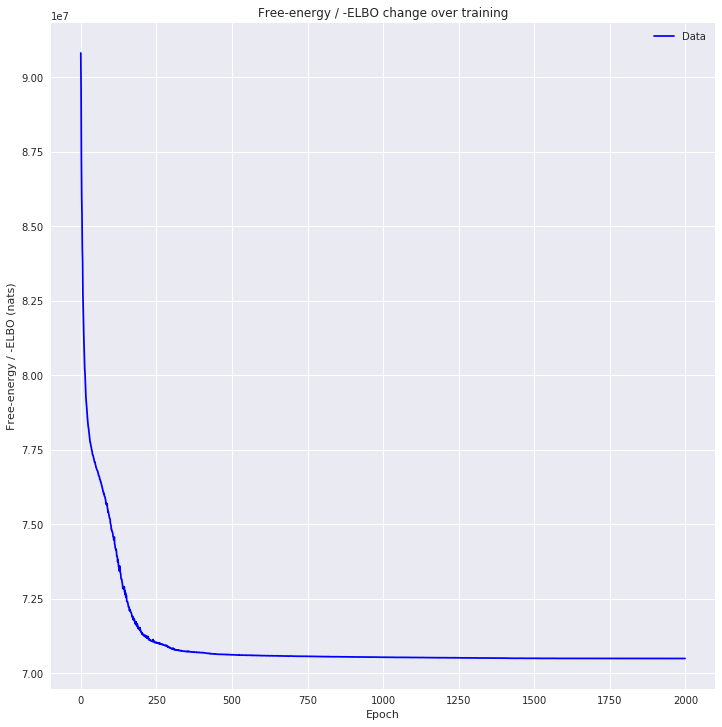

In [9]:
utils.plot_losses(losses)

In [10]:
for b in np.random.choice(range(dtfa.num_blocks), 5):
    dtfa.plot_original_brain(b)
    dtfa.plot_reconstruction(b)

IndexError: index 66 is out of bounds for axis 2 with size 65

In [ ]:
def task_labeler(b):
    return b.task

In [ ]:
dtfa.scatter_task_embedding(labeler=task_labeler, figsize=None)

In [ ]:
def subject_labeler(block):
    return 'Subject %d' % block.subject

def subject_run_labeler(block):
    return 'sub%drun%d' % (block.subject, block.run)

In [ ]:
dtfa.scatter_subject_embedding(labeler=subject_labeler, figsize=None)

In [ ]:
dtfa.visualize_factor_embedding()

In [ ]:
dtfa.average_reconstruction_error()